In [1]:
import torch
import matplotlib.pyplot as plt

import os
import sys
import logging
logging.basicConfig(level=logging.INFO)

tensoractpath = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(tensoractpath)

from tensoract.core.lptn import LPTN
from tensoract.models.boson_chains import DDBH
from tensoract.solvers.evolution import truncate_krauss_sweep, LindbladOneSite
from tensoract.solvers.optimizer import *

In [2]:
d, N = 4, 6

A = torch.zeros([1,1,d,1], dtype=torch.complex128)
A[0,0,0,0] = 1.
As = [A.clone() for _ in range(N)]
psi = LPTN(As)

# Try different values of gamma and l_ops
model = DDBH(N, d, t=0.2, U=1., mu=0.3, F=0.25, gamma=0.3, l_ops=torch.diag(torch.arange(1,d)**0.5, +1))

lab = LindbladOneSite(psi, model)

In [3]:
lab.run(20,0.4,12,12)

  0%|          | 0/20 [00:00<?, ?it/s]INFO:root:norm after 1 sweep(s): (1.0000000000000009+1.5902706012032641e-19j)
INFO:root:norm after 1 sweep(s): (0.9999999999999888+1.1996113895430708e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999999999971+3.7812286754530844e-17j)
INFO:root:norm after 1 sweep(s): (0.9999999999999954-2.9074492080721175e-16j)


INFO:root:norm after 1 sweep(s): (0.99999999999999+3.9793412743691044e-17j)
INFO:root:norm after 1 sweep(s): (0.9999999999999785+4.3471300308315095e-16j)
 15%|█▌        | 3/20 [00:00<00:03,  5.19it/s]INFO:root:norm after 1 sweep(s): (0.9999999999999845+7.631857487304149e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999999998255+3.7287019286349093e-16j)
 20%|██        | 4/20 [00:02<00:10,  1.58it/s]INFO:root:norm after 1 sweep(s): (0.9999999999987821-2.587803741082826e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999999234295-1.3309695901495302e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999998538635-2.1182584260080148e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999993904857+2.0195736003443135e-16j)
 30%|███       | 6/20 [00:02<00:04,  2.82it/s]INFO:root:norm after 1 sweep(s): (0.9999999987731155+2.6048032608792013e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999955298812+1.1261432516981738e-16j)
INFO:root:norm after 1 sweep(s): (0.9999999914878943+1.315090522719697e-16j)
INFO:root

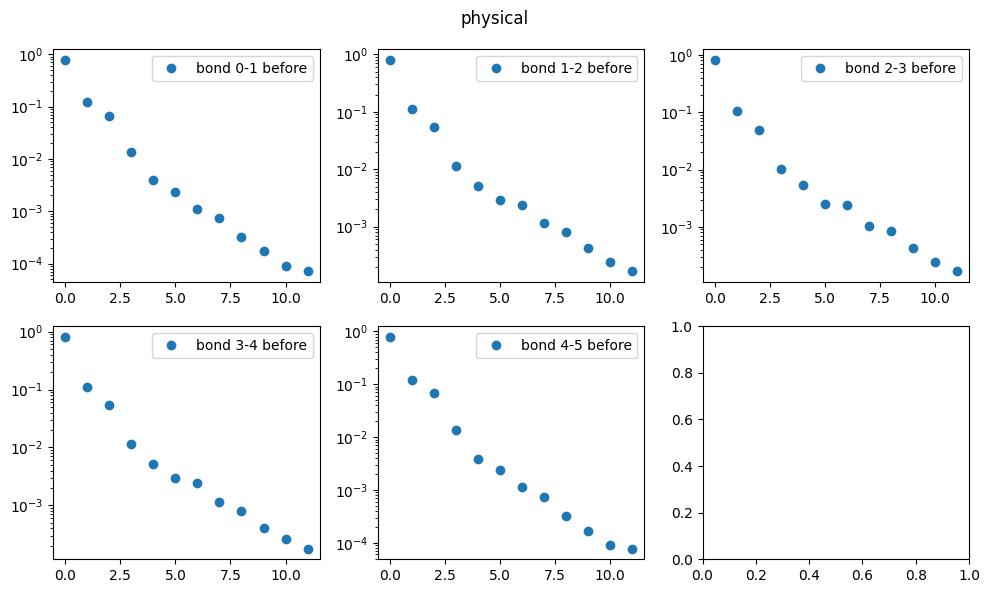

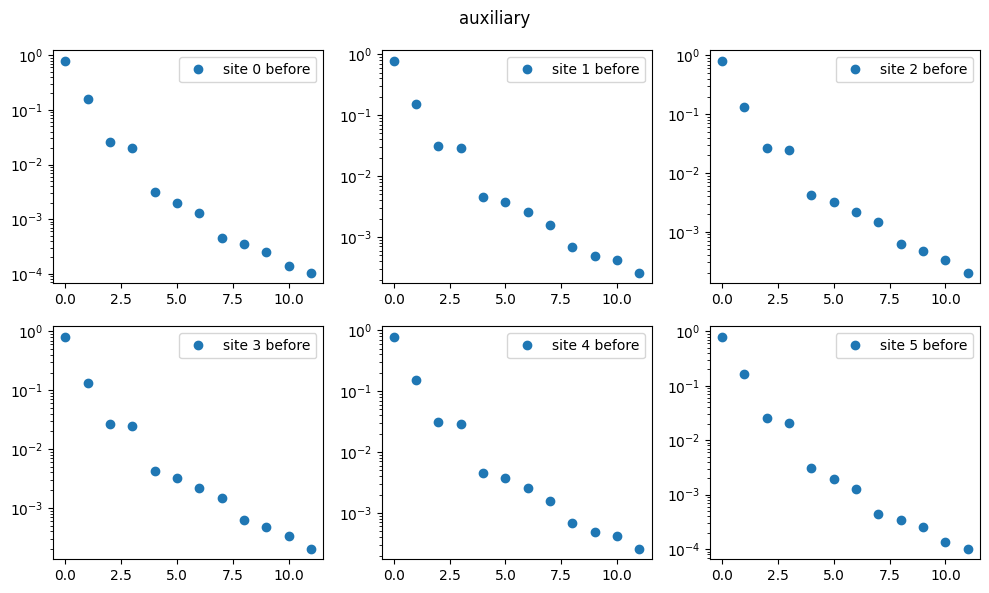

In [5]:
fig0, ax0 = plt.subplots(2, N//2, figsize=(10,6))
fig1, ax1 = plt.subplots(2, N//2, figsize=(10,6))
fig0.suptitle('physical')
fig1.suptitle('auxiliary')

for i in range(N):
    psi.orthonormalize('mixed', i)
    s = psi[i].shape
    mat1 = psi[i].permute(0,2,3,1).view(s[0]*s[2]*s[3], s[1]) # physical leg on the left!
    mat2 = psi[i].reshape(-1, s[-1])
    sigma1 = torch.linalg.svdvals(mat1)**2  # bond between leg i and i+1
    sigma2 = torch.linalg.svdvals(mat2)**2
    ax1.flat[i].semilogy(sigma2, 'o', label=f'site {i} before')
    ax1.flat[i].legend()
    if i < N-1:
        ax0.flat[i].semilogy(sigma1, 'o', label=f'bond {i}-{i+1} before')
        ax0.flat[i].legend()

fig0.tight_layout()
fig1.tight_layout()

In [7]:
# change here see if something happens
m_max = k_max = 12

phi = psi.copy()

for niter in range(20):
    disentangle_sweep(phi, tol=1e-9, m_max=m_max, k_max=k_max, max_sweep=1, eps=1e-9, max_iter=40)

    if (niter+1) % 5 == 0:
        for i in range(N):
            phi.orthonormalize('mixed', i)
            s = phi[i].shape
            mat1 = phi[i].permute(0,2,3,1).view(s[0]*s[2]*s[3], s[1]) # physical leg on the left!
            mat2 = phi[i].reshape(-1, s[-1])
            sigma1 = torch.linalg.svdvals(mat1)**2  # bond between leg i and i+1
            sigma2 = torch.linalg.svdvals(mat2)**2
            ax1.flat[i].plot(sigma2, 'o', label=f'after {(niter+1)} sweeps')
            ax1.flat[i].legend()
            if i < N-1:
                ax0.flat[i].plot(sigma1, 'o', label=f'after {(niter+1)} sweeps')
                ax0.flat[i].legend()

INFO:root:renyi entropy converged at tol=1e-09 after 31 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 38 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 25 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 6 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 24 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 34 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 30 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 25 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 6 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 17 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 32 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 29 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 8 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 15 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 21 iteration

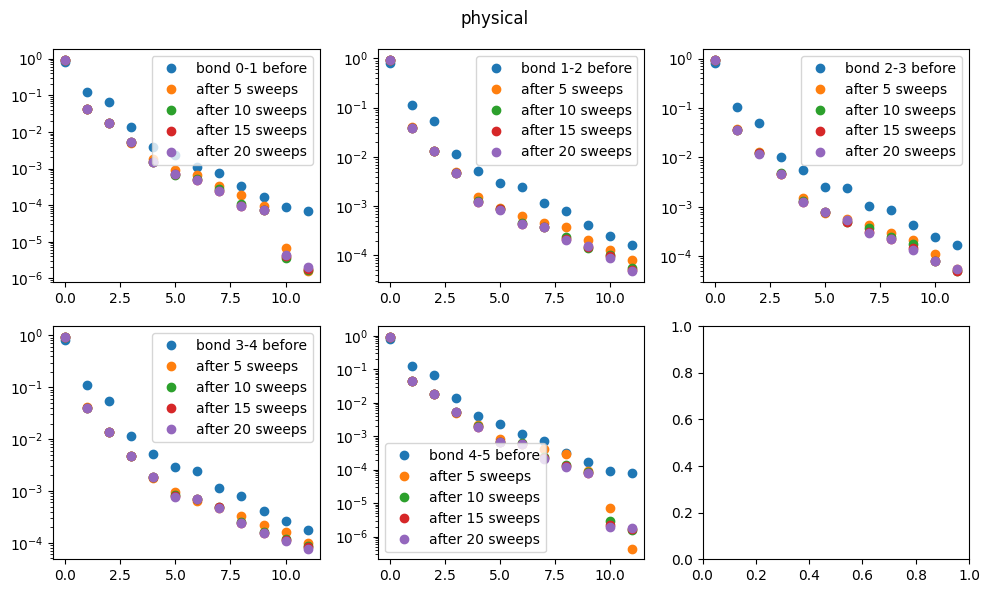

In [8]:
plt.figure(fig0)
plt.show()

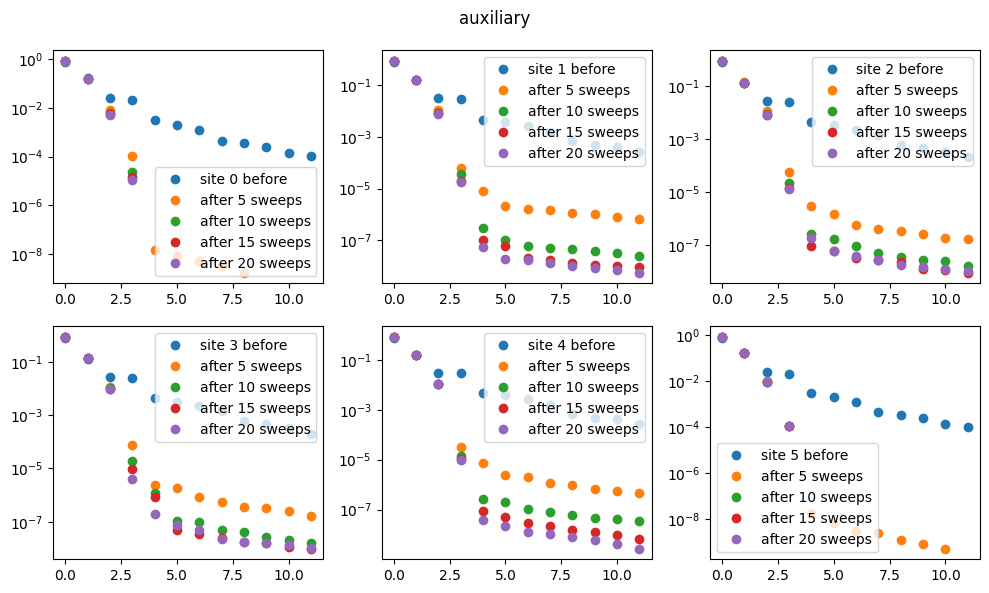

In [9]:
plt.figure(fig1)
plt.show()